In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/Dwilusiana/-Data-Analytics-Policy-Portfolio/main/02_forecasting/inflation_monthly.csv"
df = pd.read_csv(url)

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

df.head()

,date,inflation_mom
0,2023-01-01,0.34
1,2023-02-01,0.16
2,2023-03-01,0.18
3,2023-04-01,0.33
4,2023-05-01,0.09


In [3]:
df_ts = df.set_index('date')

#Metode Anomaly Detection

In [5]:
#HITUNG Z-
mean = df_ts['inflation_mom'].mean()
std = df_ts['inflation_mom'].std()

df_ts['z_score'] = (df_ts['inflation_mom'] - mean) / std

df_ts.head()


,inflation_mom,z_score
date,,
2023-01-01,0.34,0.382693
2023-02-01,0.16,-0.057264
2023-03-01,0.18,-0.008380
2023-04-01,0.33,0.358251
2023-05-01,0.09,-0.228359


In [6]:
#ENTUKAN THRESHOLD ANOMALI
threshold = 2

df_ts['anomaly'] = df_ts['z_score'].abs() > threshold

df_ts[df_ts['anomaly']]


,inflation_mom,z_score,anomaly
date,,,
2025-01-01,-0.76,-2.305935,True
2025-03-01,1.65,3.584604,True
2025-04-01,1.17,2.411385,True


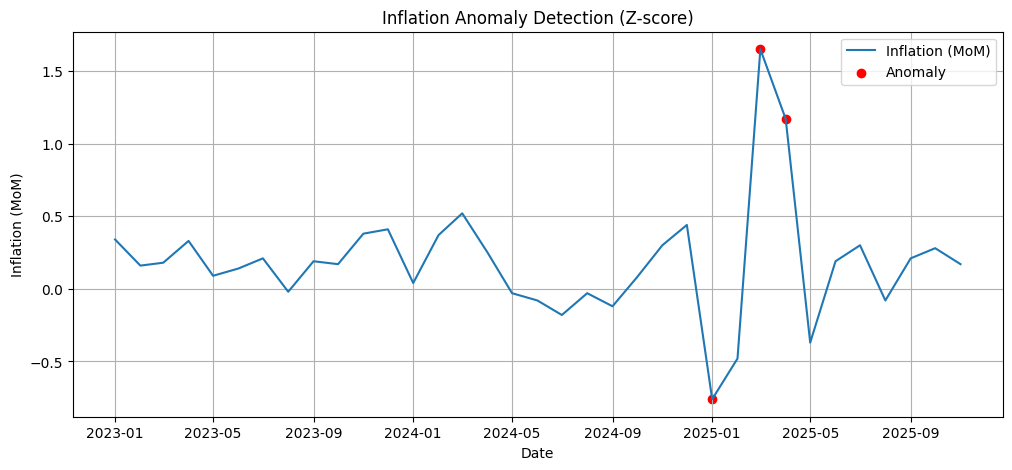

In [8]:
#VISUALISASI ANOMALI
plt.figure(figsize=(12,5))
plt.plot(df_ts.index, df_ts['inflation_mom'], label='Inflation (MoM)')

plt.scatter(
    df_ts[df_ts['anomaly']].index,
    df_ts[df_ts['anomaly']]['inflation_mom'],
    color='red',
    label='Anomaly'
)

plt.title('Inflation Anomaly Detection (Z-score)')
plt.xlabel('Date')
plt.ylabel('Inflation (MoM)')
plt.legend()
plt.grid(True)
plt.show()
